#### Distance Metrics to be Tested

1. Cosine 
2. Euclidean
3. Yule

In [2]:
#'''Required Libraries (uncomment for installation)'''

# !pip install pandas
# !pip install numpy
# !pip install scipy

In [3]:
'''Importing Libraries'''

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance

#### Distance Calulations

In [4]:
def plot_graph(sim_arr, model, label, k, gr_type = '-k'):
    x = np.linspace(0, len(sim_arr)-1, len(sim_arr), dtype=int)
    plt.plot(x, sim_arr, gr_type)

    plt.title("Distance Similarity Scores at k = " + k)              
    plt.xlabel('Count')
    plt.ylabel('Simialrity Scores')

In [16]:
def performance_graph(cosi_2D, eucd_2D, yule_2D, arr):

    for i in range(len(cosi_2D)):
        barWidth = 0.25
        fig = plt.subplots(figsize =(6, 4))

        # set height of bar
        cosi = cosi_2D[i]
        eucd = eucd_2D[i]
        yule = yule_2D[i]

        # Set position of bar on X axis
        br1 = np.arange(len(cosi))
        br2 = [x + barWidth for x in br1]
        br3 = [x + barWidth for x in br2]

        # Make the plot
        plt.bar(br1, cosi, color ='r', width = barWidth,
                edgecolor ='grey', label ='Cosine')
        plt.bar(br2, eucd, color ='b', width = barWidth,
                edgecolor ='grey', label ='Eucledian')
        plt.bar(br3, yule, color ='c', width = barWidth,
                edgecolor ='grey', label ='Yule')

        # Adding Xticks
        plt.xlabel('K Value', fontsize = 12)
        plt.ylabel('Human-Model Weightage alignment', fontsize = 12)
        plt.xticks([r + barWidth for r in range(len(cosi))], arr)
        plt.title('Performance Graph - Cross Domain')

        plt.legend()
        plt.show()

In [6]:
def human_sim_scoring(cont_arr, opt_list):
    opt_list_desc,count_arr = [], []
    
    # Arranging the distance array in descending order and deriving index values
    cont_arr = np.asarray(cont_arr)
    sort_idx = (-cont_arr).argsort()
    
    
    # Appending the options list as per the score array
    for i in range(len(sort_idx)):
        opt_list_new = []
        for j in range(len(sort_idx[0])):
            opt_list_new.append(opt_list[i][sort_idx[i][j]])
        opt_list_desc.append(opt_list_new)
    
    opt_list_desc = np.asarray(opt_list_desc)
    
    
    # Keeping the count with human similarity scores
    for i in range(len(opt_list)):
        count = 0
        for j in range(len(opt_list[i])):
            if (opt_list_desc[i][j] == opt_list[i][j]):
                count += 1
        count_arr.append(count)
     
    
    return count_arr

In [7]:
'''Calculations to cehck the closest analogy answer'''

def after_distance(cont_arr, optio):
    max_arr, idx2, word = [], [], []
    
    for instances in range(len(cont_arr)):
        max_arr.append(np.amax(cont_arr[instances]))
    
    for ind_val2 in range(len(max_arr)):
        idx2.append(np.where(cont_arr[ind_val2] == max_arr[ind_val2]))
    
    idx2 = np.asarray(idx2)

    for i in range(len(optio)):
        word.append(optio[i][idx2[i]])
    
    return max_arr, word

In [8]:
'''Calculating Distance Function'''

def cal_distances(quest, optio, k, model="LSA"):  
    cosi_score_avg, eucd_score_avg, yule_score_avg = [], [], []
    cosi_arr, eucd_arr, yule_arr = [], [], []
    cosi_arr_desc, eucd_arr_desc, yule_arr_desc = [], [], []

    for i in range(len(quest)):
        tmp_arr_cosi, tmp_arr_eucd, tmp_arr_yule = [], [], []
        tmp_arr_cosi_desc, tmp_arr_eucd_desc, tmp_arr_yule_desc = [], [], []
        
        for j in range(len(optio[i])):
            
            if model == "LSA":
                # Calculating Cosine 
                tmp_arr_cosi.append(1 - (distance.cosine(dict_word_vectors[quest[i][0]] - dict_word_vectors[quest[i][2]], \
                                                         dict_word_vectors[quest[i][1]] - dict_word_vectors[optio[i][j]])))

                # Calculating Euclidean 
                tmp_arr_eucd.append(1 - (distance.euclidean(dict_word_vectors[quest[i][0]] - dict_word_vectors[quest[i][2]], \
                                                            dict_word_vectors[quest[i][1]] - dict_word_vectors[optio[i][j]])))

                # Calculating Yule
                tmp_arr_yule.append(1 - (distance.yule(dict_word_vectors[quest[i][0]] - dict_word_vectors[quest[i][2]], \
                                                       dict_word_vectors[quest[i][1]] - dict_word_vectors[optio[i][j]])))

                
            elif model == "GloVe":
                # Calculating Cosine 
                tmp_arr_cosi.append(1 - (distance.cosine(glove_word_vector[quest[i][0]] - glove_word_vector[quest[i][2]], \
                                                         glove_word_vector[quest[i][1]] - glove_word_vector[optio[i][j]])))

                # Calculating Euclidean 
                tmp_arr_eucd.append(1 - (distance.euclidean(glove_word_vector[quest[i][0]] - glove_word_vector[quest[i][2]], \
                                                            glove_word_vector[quest[i][1]] - glove_word_vector[optio[i][j]])))

                # Calculating Yule
                tmp_arr_yule.append(1 - (distance.yule(glove_word_vector[quest[i][0]] - glove_word_vector[quest[i][2]], \
                                                       glove_word_vector[quest[i][1]] - glove_word_vector[optio[i][j]])))
                
        
        
        # Appending Arrays
        cosi_arr.append(tmp_arr_cosi)
        eucd_arr.append(tmp_arr_eucd)
        yule_arr.append(tmp_arr_yule)
    
    
    # Calling function to get the highest similarity array and the highest similarty word
    max_arr_cosi, word_cosi = after_distance(cosi_arr, optio)
    max_arr_eucd, word_eucd = after_distance(eucd_arr, optio)
    max_arr_yule, word_yule = after_distance(yule_arr, optio)
    
    # Human Answer Ranking Score calculations
    hum_sim_cosi = human_sim_scoring(cosi_arr, optio)
    hum_sim_eucd = human_sim_scoring(eucd_arr, optio)
    hum_sim_yule = human_sim_scoring(yule_arr, optio)
    
    cosi_score_avg.append(np.average(hum_sim_cosi))
    eucd_score_avg.append(np.average(hum_sim_eucd))
    yule_score_avg.append(np.average(hum_sim_yule))
    
    
    '''Genrating Dataframes'''
  
    # For Human Prompt and Smilarity Scores wrt all prompts
    df_question  = pd.DataFrame(quest, columns=["Quest 1", "Quest 2", "Quest 3"])
    df_human_ans  = pd.DataFrame(ans_list, columns=["Prompt 1", "Prompt 2", "Prompt 3", "Prompt 4", "Prompt 5",])
    

    cosi_sim_scores = pd.DataFrame(cosi_arr, columns=["Similarity 1", "Similarity 2", "Similarity 3", "Similarity 4", "Similarity 5",])
    eucd_sim_scores = pd.DataFrame(eucd_arr, columns=["Similarity 1", "Similarity 2", "Similarity 3", "Similarity 4", "Similarity 5",])
    yule_sim_scores = pd.DataFrame(yule_arr, columns=["Similarity 1", "Similarity 2", "Similarity 3", "Similarity 4", "Similarity 5",])
    
        
    # For Calculated output derived from highest similarity
    tmp_cosi_df = pd.DataFrame({"Calculated":word_cosi, "Model Similarity": max_arr_cosi, "Score": hum_sim_cosi})
    tmp_eucd_df = pd.DataFrame({"Calculated":word_eucd, "Model Similarity": max_arr_eucd, "Score": hum_sim_eucd})
    tmp_yule_df = pd.DataFrame({"Calculated":word_yule, "Model Similarity": max_arr_yule, "Score": hum_sim_yule})
    
    
    # Merging known Datasets
    cosi_scores = df_question.join(cosi_sim_scores)
    eucd_scores = df_question.join(eucd_sim_scores)
    yule_scores = df_question.join(yule_sim_scores)
    
    cosi_merge_df = cosi_scores.join(df_human_ans)
    eucd_merge_df = eucd_scores.join(df_human_ans)
    yule_merge_df = yule_scores.join(df_human_ans)    
    
    
    # Merging different distance metrics into single Dataframe
    cosi_df = tmp_cosi_df.join(cosi_merge_df)
    eucd_df = tmp_eucd_df.join(eucd_merge_df)
    yule_df = tmp_yule_df.join(yule_merge_df)

    
    # Generating Plots
    for i in k:
        plot_graph(max_arr_cosi, model, label = 'Cosine Distance', k = k, gr_type = '-r')
        plot_graph(max_arr_eucd, model, label = 'Euclidean Distance', k = k, gr_type = '-b')
        plot_graph(max_arr_yule, model, label = 'Yule Distance', k = k, gr_type = '-c')
        plt.show()

    
    return cosi_df, eucd_df, yule_df, cosi_score_avg, eucd_score_avg, yule_score_avg 

#### Calling Questions and Options Dataframes for list Conversions 

In [18]:
'''Create List for Questions, Options, and Answers (Human Prompts)'''

def conv_list(df):
    que_list, opt_list, ans_list = [], [], []
    
    for idx, row in df.iterrows():
        tmp_list_que = [row.prompt1, row.prompt2, row.prompt3]
        tmp_list_opt = [row.response1, row.response2, row.response3, row.response4, row.response5]
        tmp_list_ans = [row.response1, row.response2, row.response3, row.response4, row.response5]

        que_list.append(tmp_list_que)
        opt_list.append(tmp_list_opt)
        ans_list.append(tmp_list_ans)

    return np.asarray(que_list), np.asarray(opt_list), np.asarray(ans_list)

In [19]:
question = pd.read_csv('Que_Opt2.csv', index_col=0)
# question = pd.read_csv('Que_Opt2_in_domain.csv', index_col=0)
que_list, opt_list, ans_list = conv_list(question)

### Importing Models

#### LSA .txt files for different k values

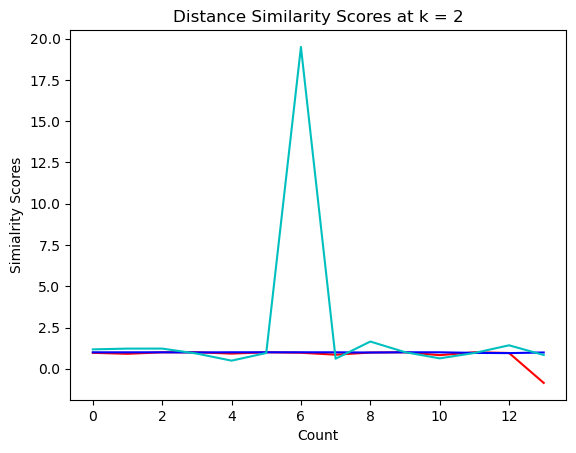

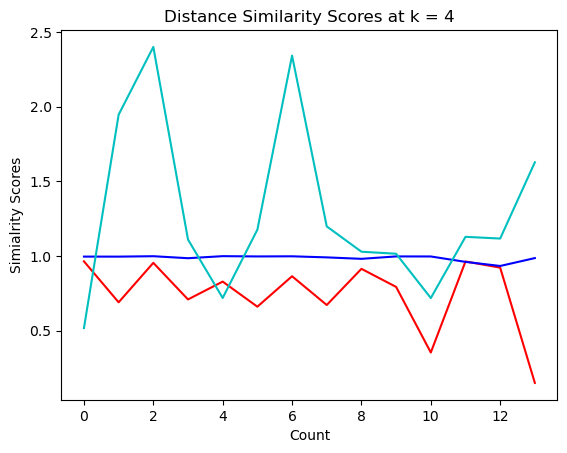

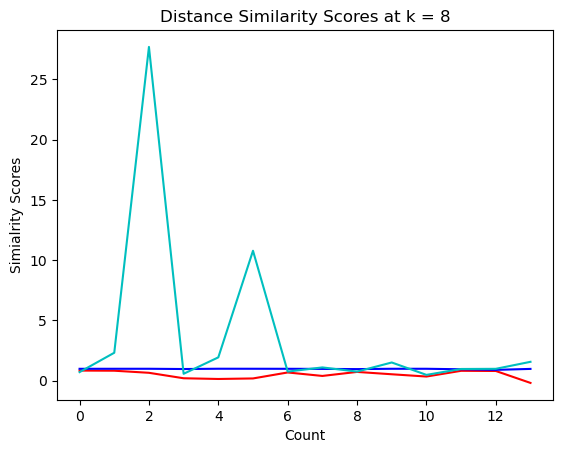

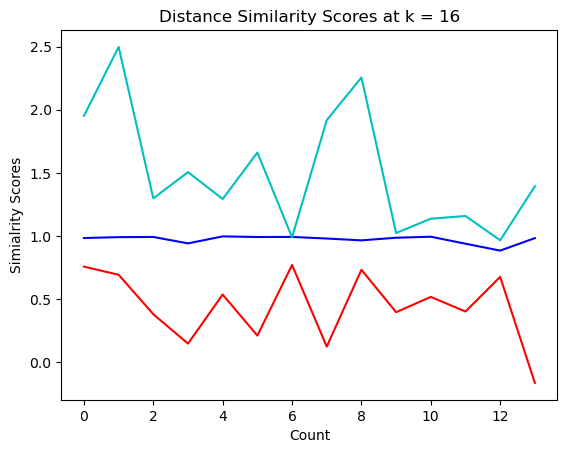

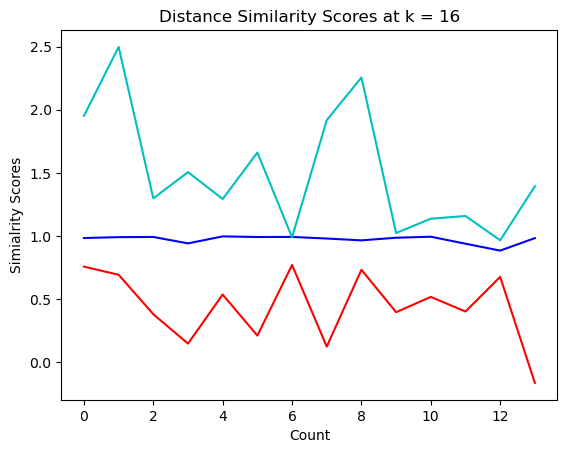

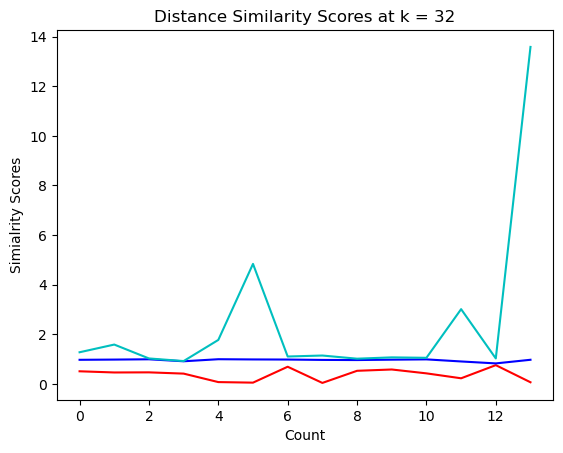

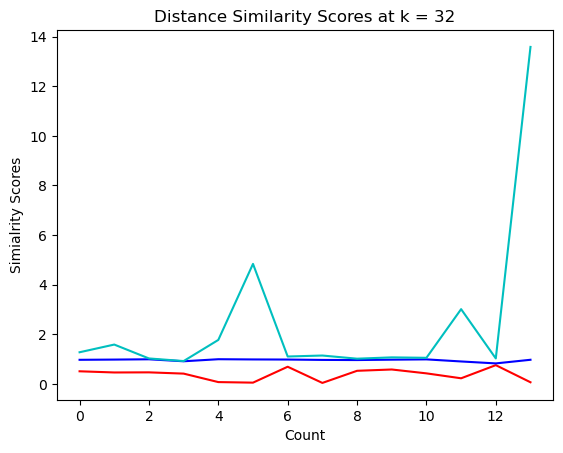

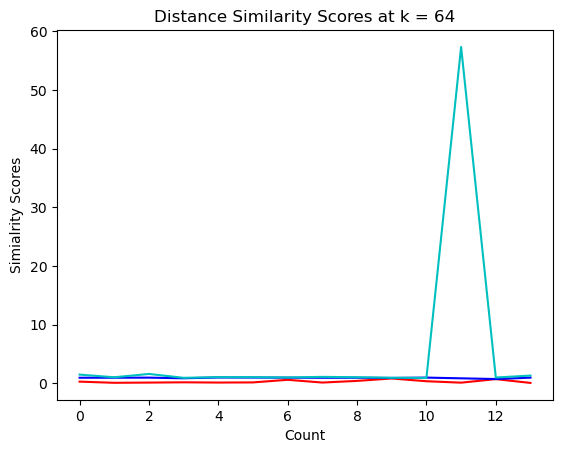

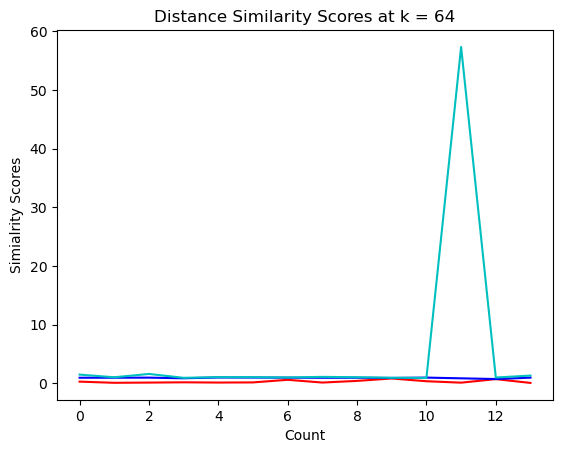

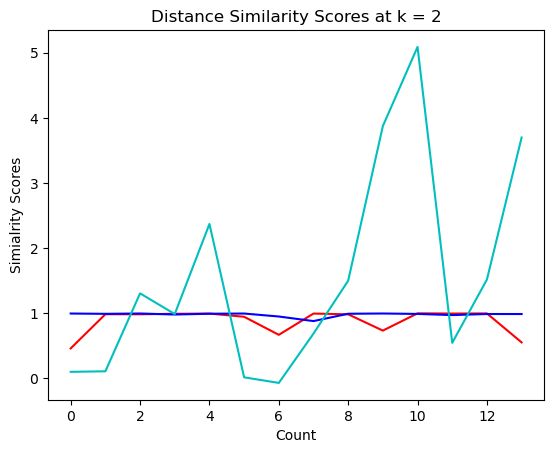

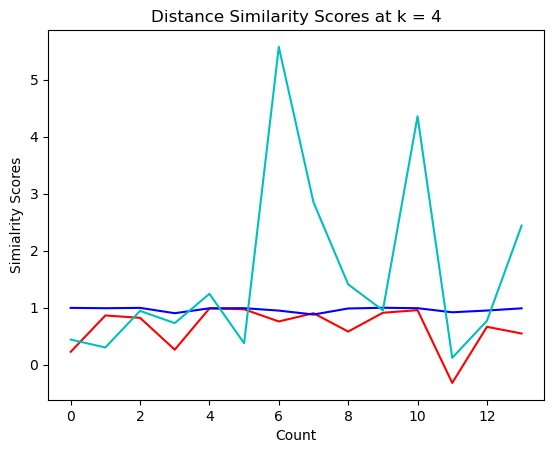

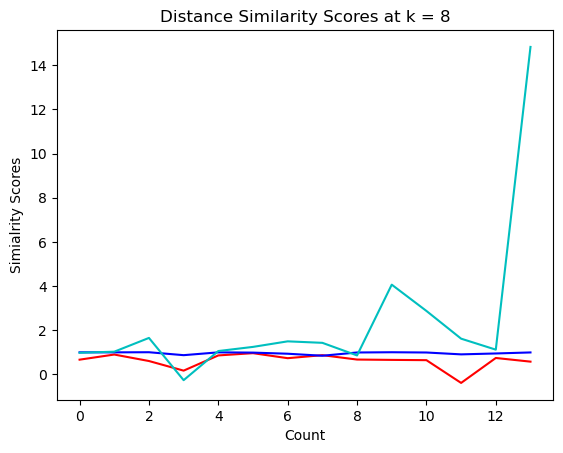

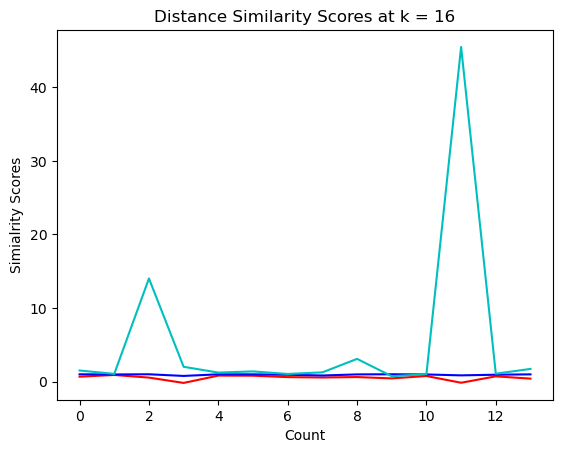

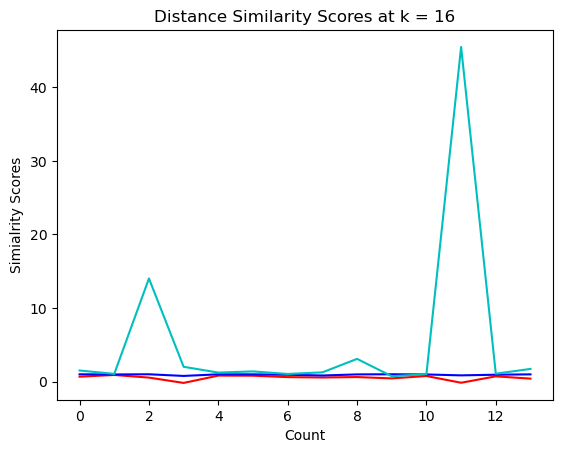

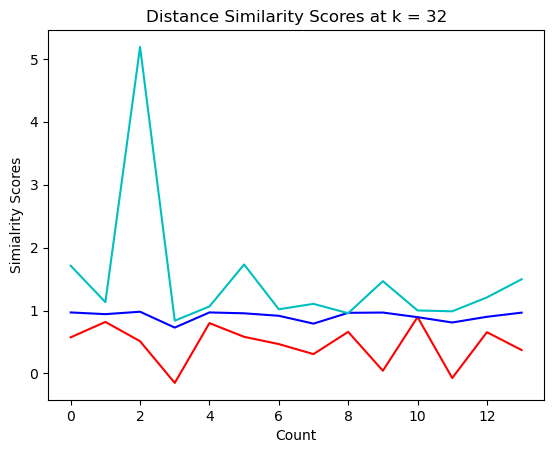

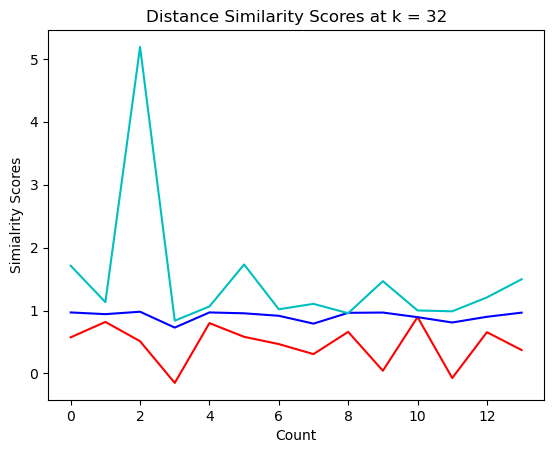

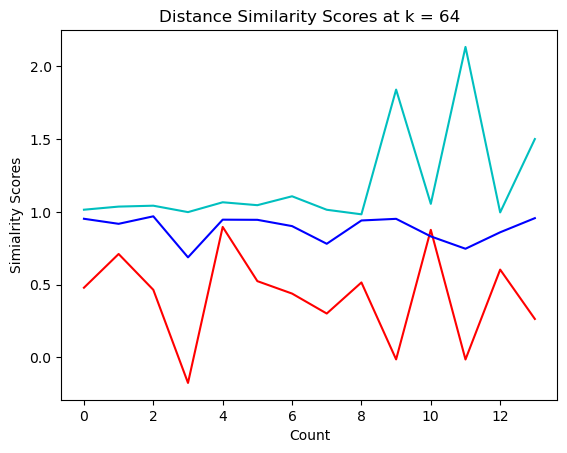

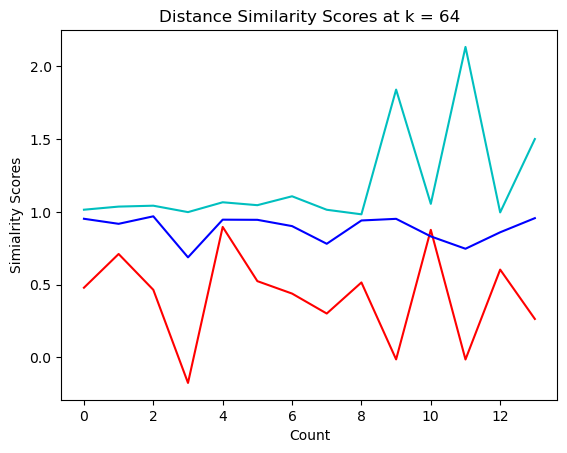

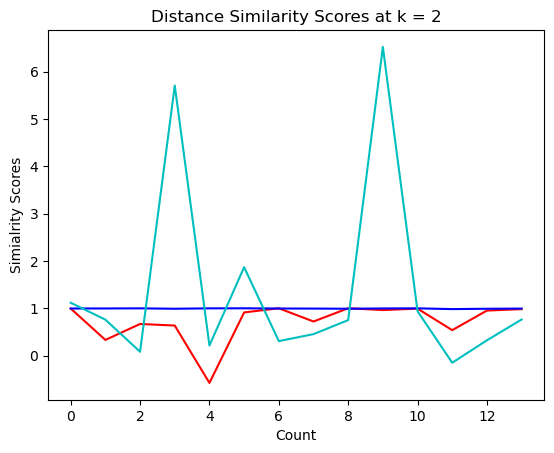

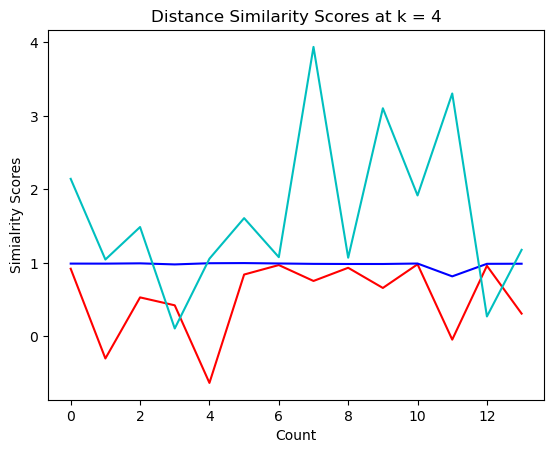

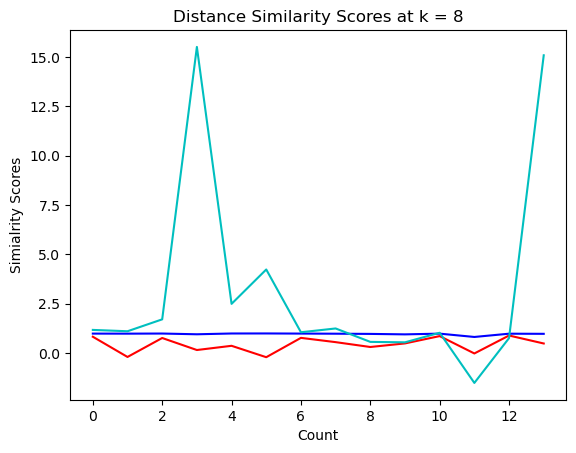

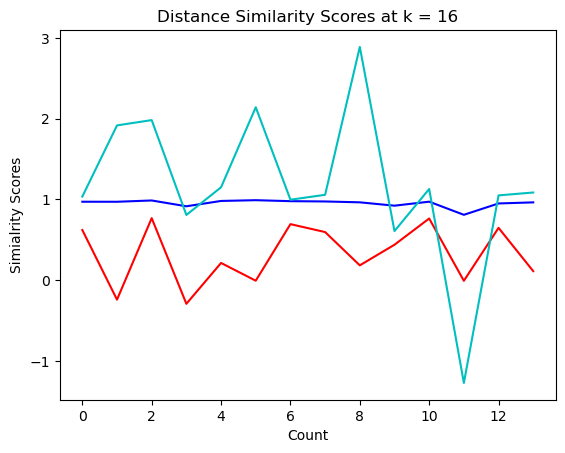

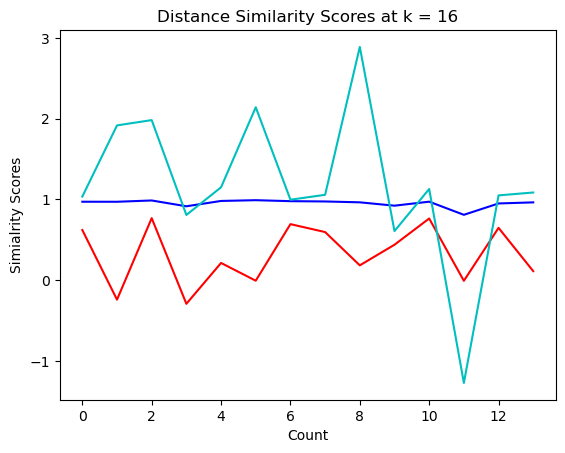

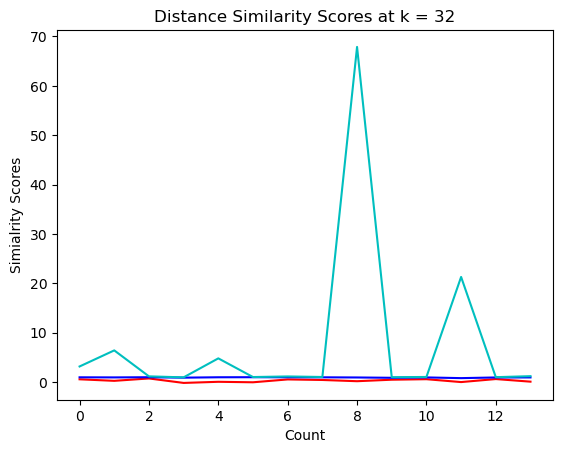

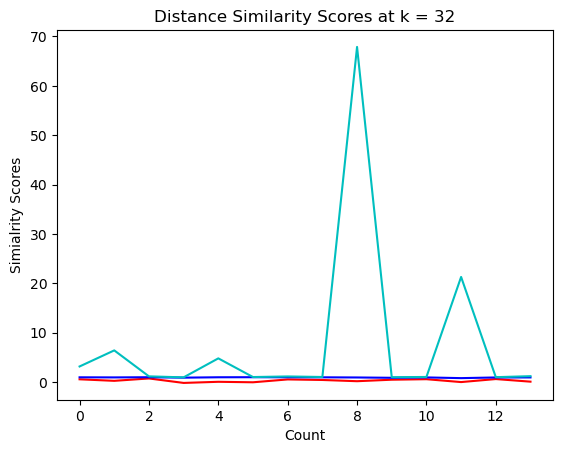

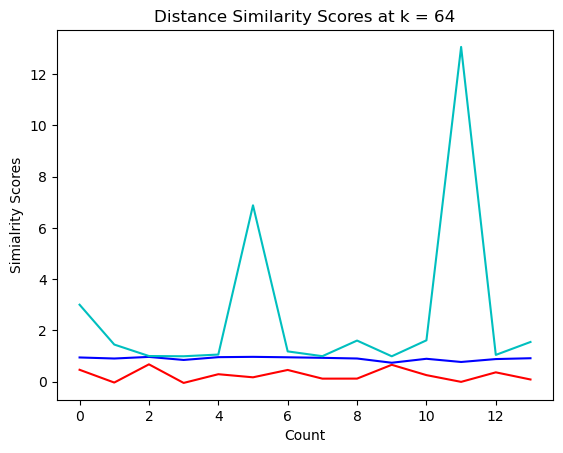

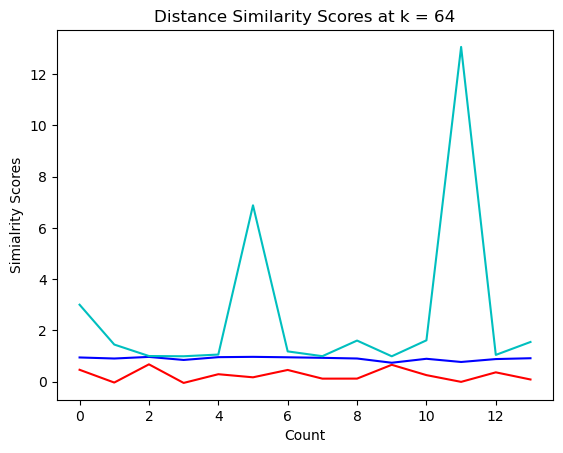

In [20]:
# For fictional genere and all k values runs

'''Importing all txt File and converting into '''

import pickle

k_arr = ["2", "4", "8", "16", "32", "64"]
genre_arr = ["fiction", "nonfiction", "poetry"]      # Make changes in the loop - currently set to genre_arr[0] as default

fin_cosi, fin_eucd, fin_yule = [], [], []

for i in range(len(genre_arr)):
    avg_plot_cosi, avg_plot_eucd, avg_plot_yule = [], [], []
    for j in range(len(k_arr)):
        
        # Calling LSA model
        path = genre_arr[i] + "_term_embeddings_TXT/term2topic_" + genre_arr[i] + "_" + k_arr[j] + ".txt"
        
        word_file = open(path, "rb")
        word_vectors = pickle.load(word_file)
        word_file.close()
        dict_word_vectors = word_vectors
        
        # Calculating Distance 
        cosi_similarity, eucd_similarity, yule_similarity, avg_cosi, avg_eucd, avg_yule = cal_distances(que_list, opt_list, k = k_arr[j], model="LSA")
        
        # Displaying Similarity Scores
        display(cosi_similarity.style.set_caption("Cosine Similarity Scores for " + genre_arr[i] + " at " + "k = " + k_arr[j]))
        display(eucd_similarity.style.set_caption("Euclidean Similarity Scores for " + genre_arr[i] + " at " + "k = " + k_arr[j]))
        display(yule_similarity.style.set_caption("Yule Similarity Scores for " + genre_arr[i] + " at " + "k = " + k_arr[j]))
        
        avg_plot_cosi.append(avg_cosi)
        avg_plot_eucd.append(avg_eucd)
        avg_plot_yule.append(avg_yule)
    
    fin_cosi.append(avg_plot_cosi)
    fin_eucd.append(avg_plot_eucd)
    fin_yule.append(avg_plot_yule)


# Ravlling to convert into 1D array to respace for plotting
cosi = np.ravel(fin_cosi)
eucd = np.ravel(fin_eucd)
yule = np.ravel(fin_yule)
        

cosi_2D = np.reshape(cosi, (-1, len(fin_cosi[0])))
eucd_2D = np.reshape(eucd, (-1, len(fin_eucd[0])))
yule_2D = np.reshape(yule, (-1, len(fin_yule[0])))   

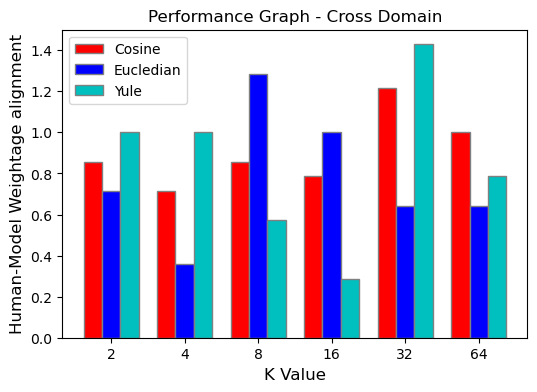

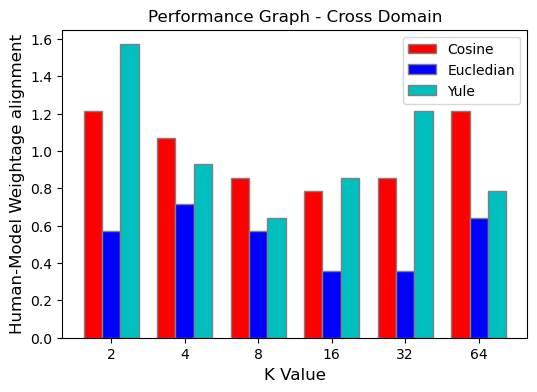

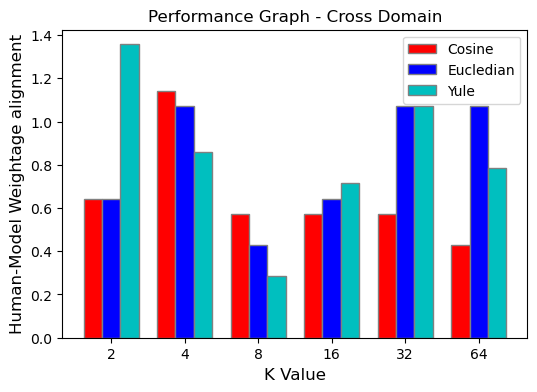

In [21]:
performance_graph(cosi_2D, eucd_2D, yule_2D, k_arr)

#### Glove 

In [13]:
## Parsing File for non-LSA models

def parse_file(file_name):
    word_vectors = {}
    with open(file_name, encoding='utf-8') as f:
        for line in f:
            first_whitespace = line.index(" ")
            word = line[:first_whitespace].strip('"')
            vector = np.array(line[first_whitespace + 1:].split(" "), dtype=np.float32)
            word_vectors[word] = vector
            
    return word_vectors

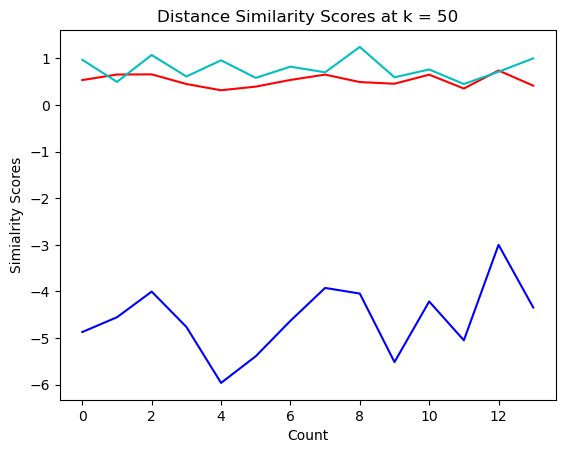

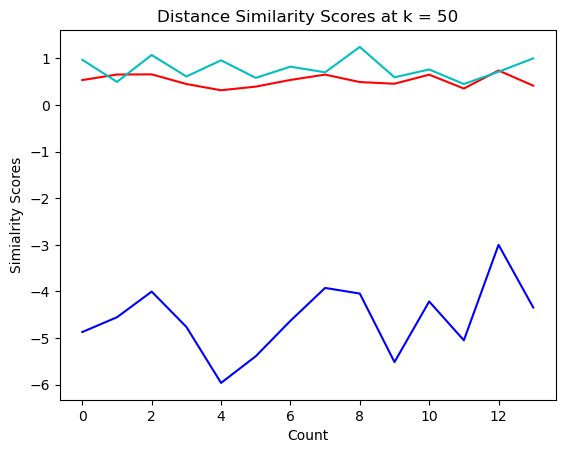

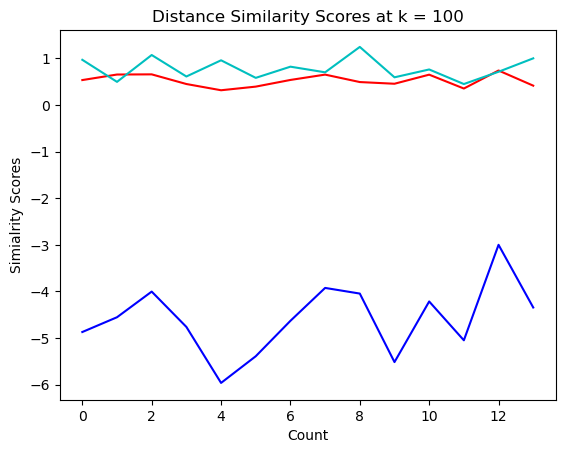

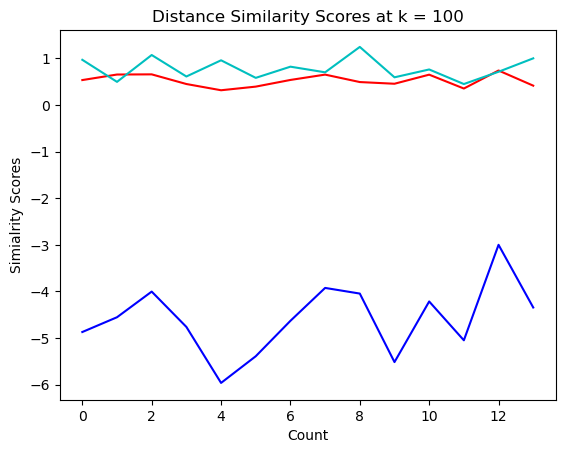

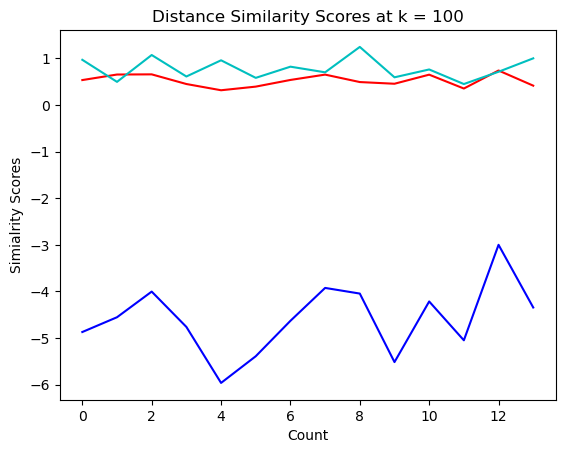

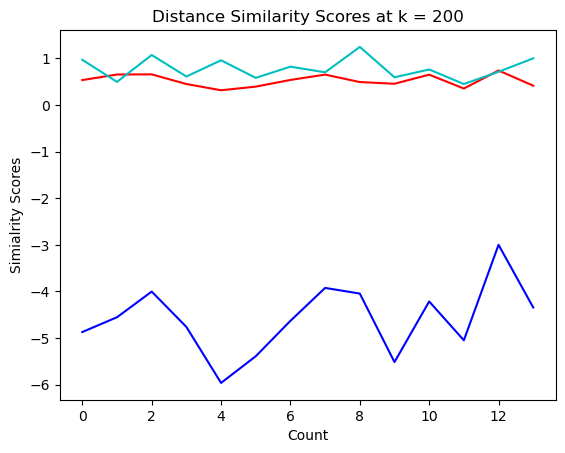

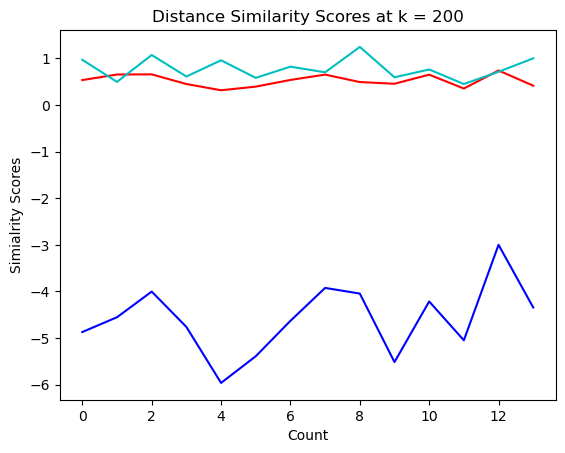

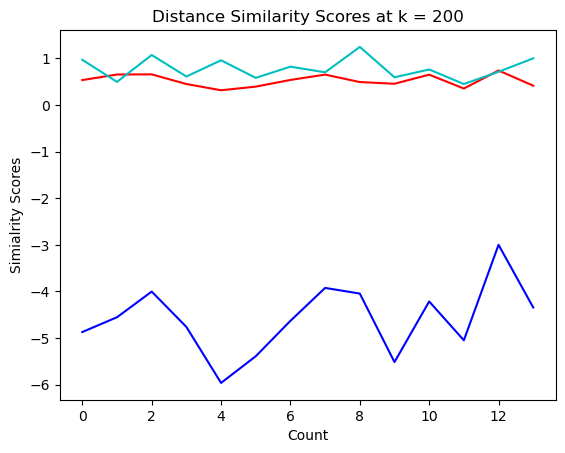

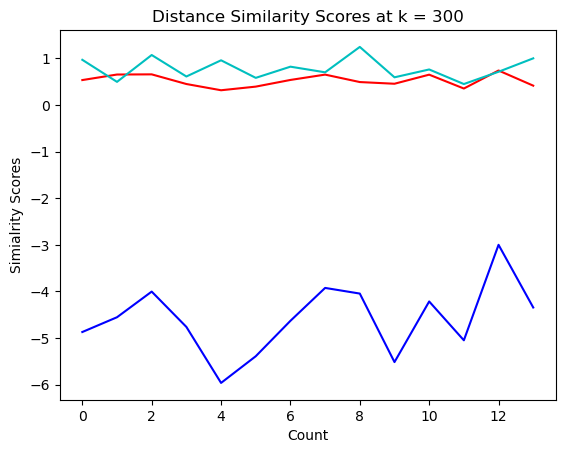

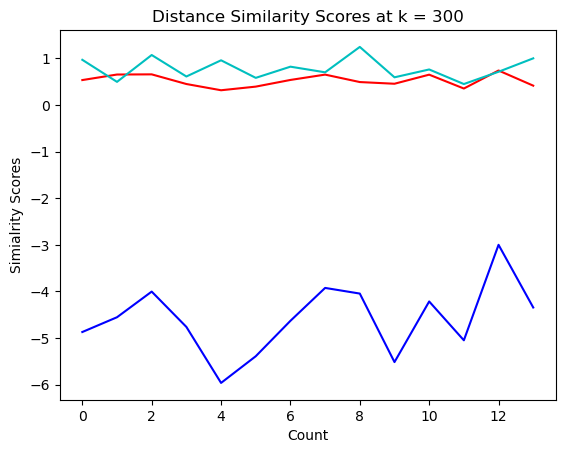

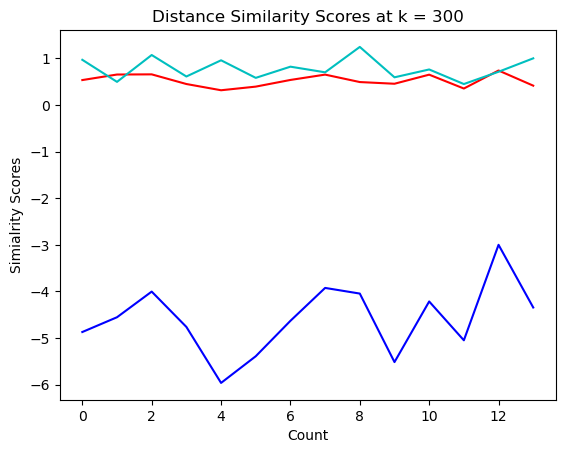

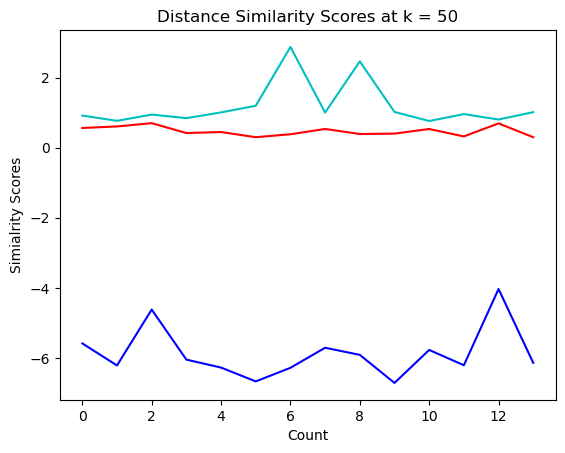

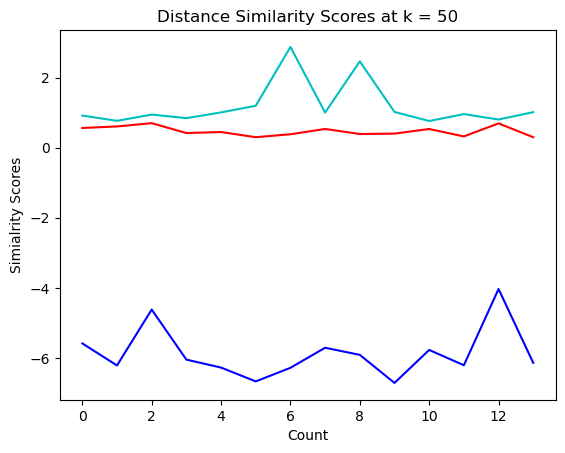

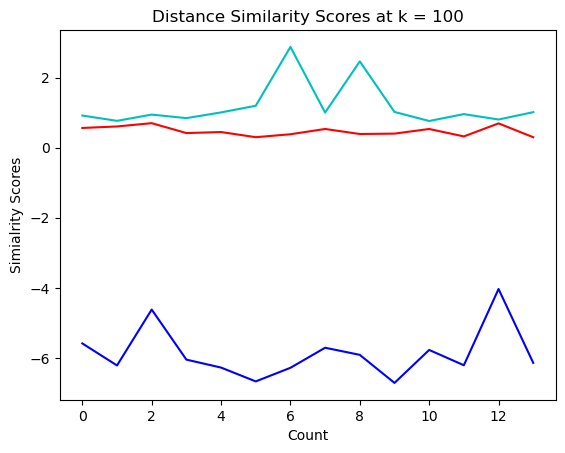

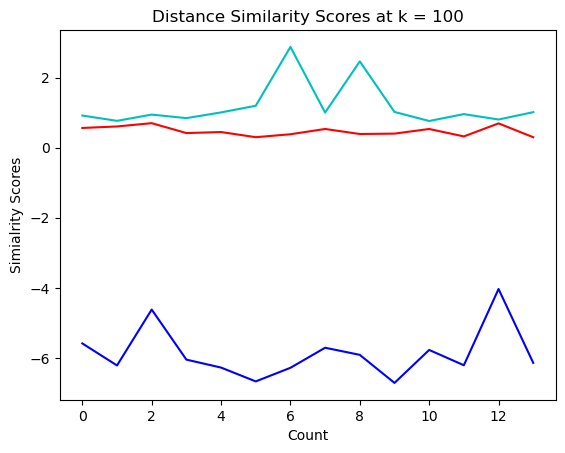

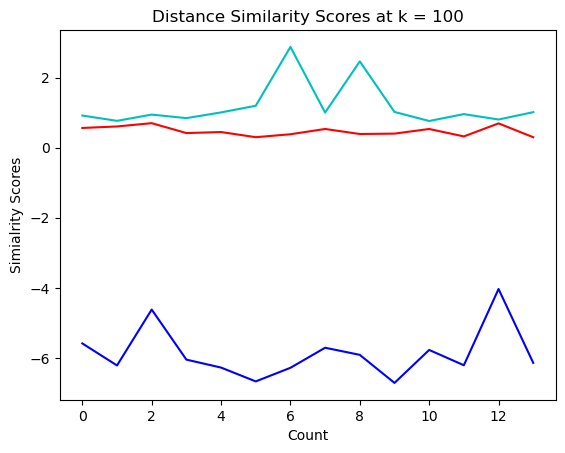

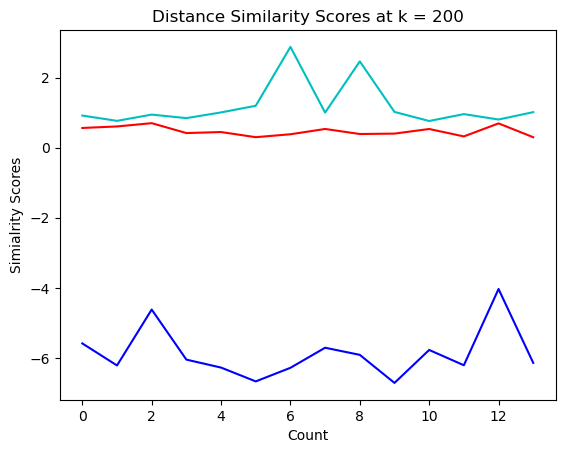

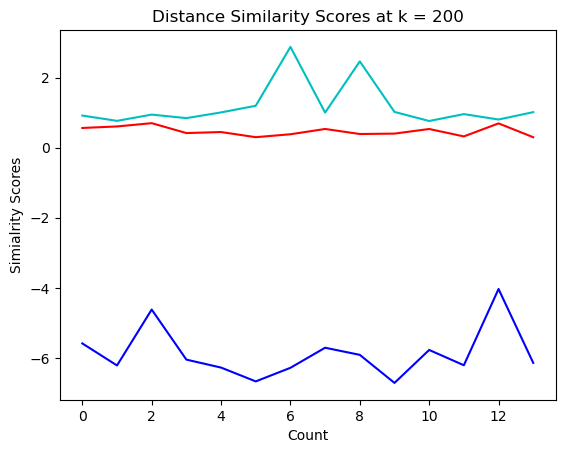

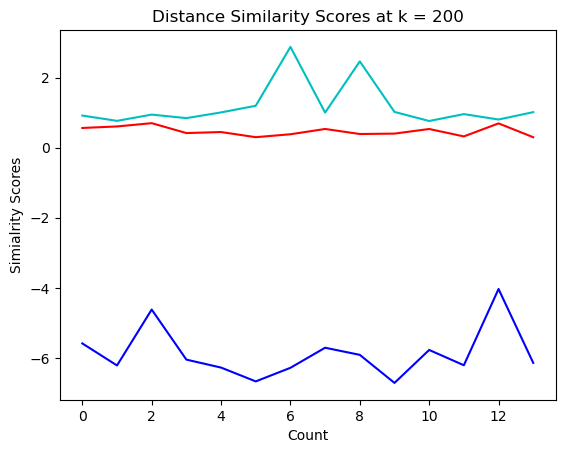

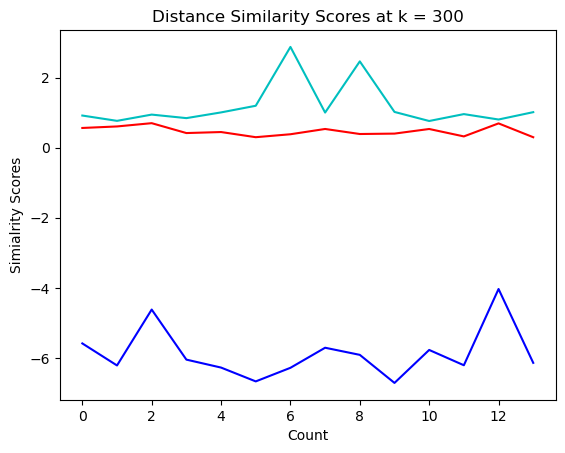

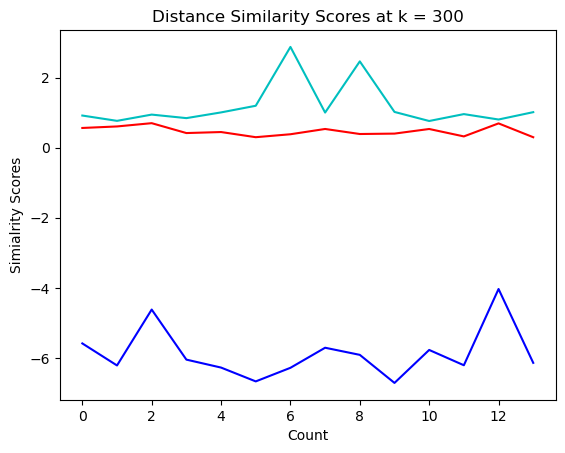

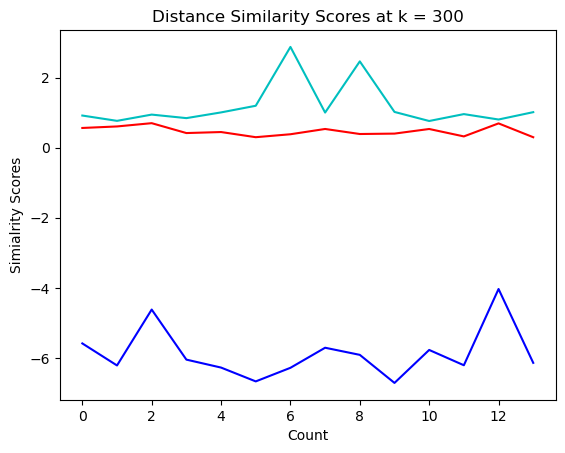

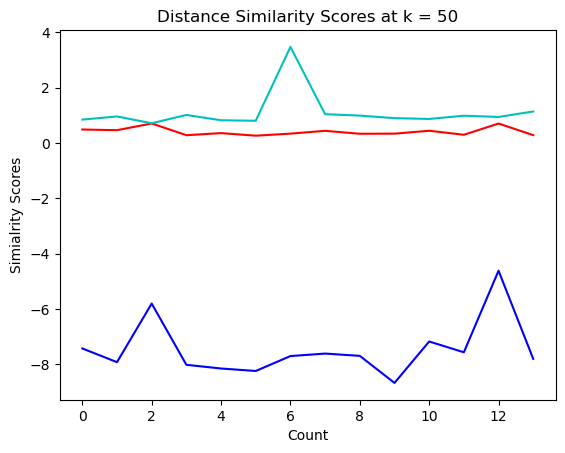

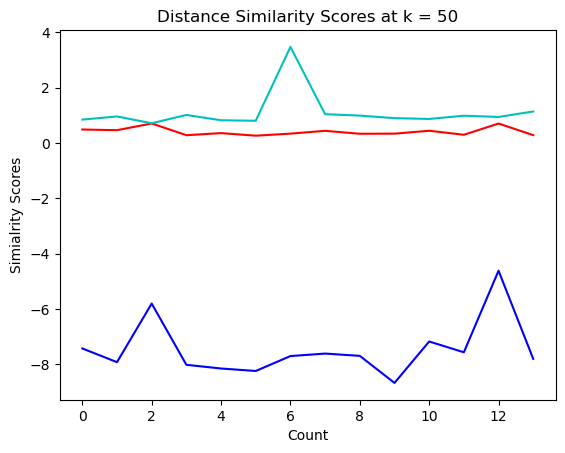

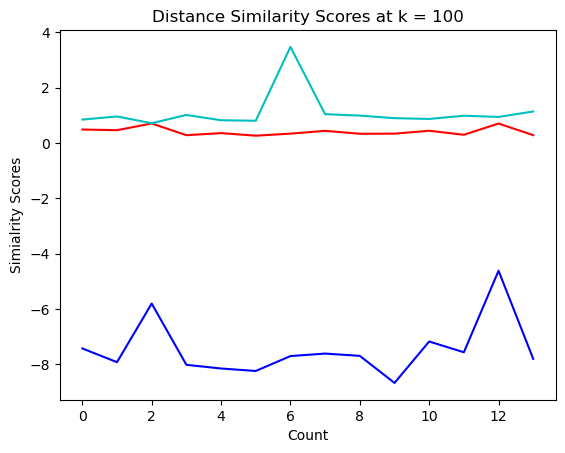

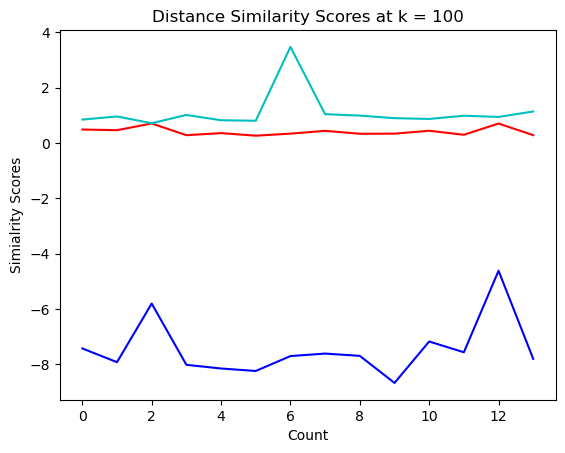

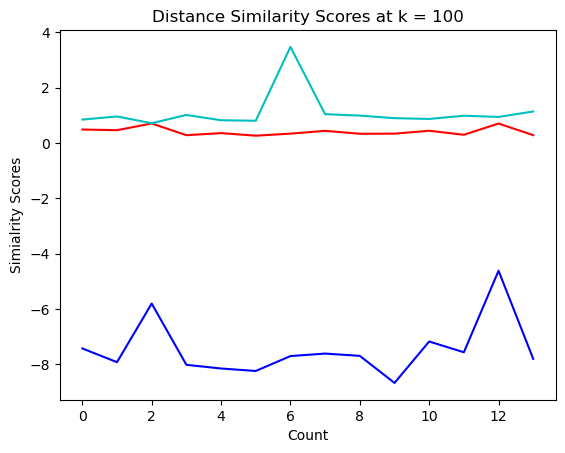

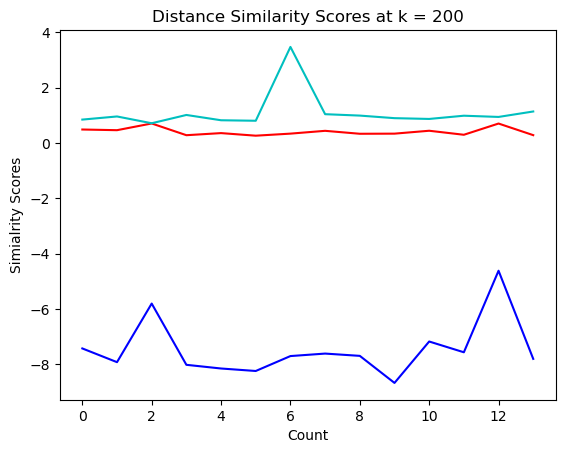

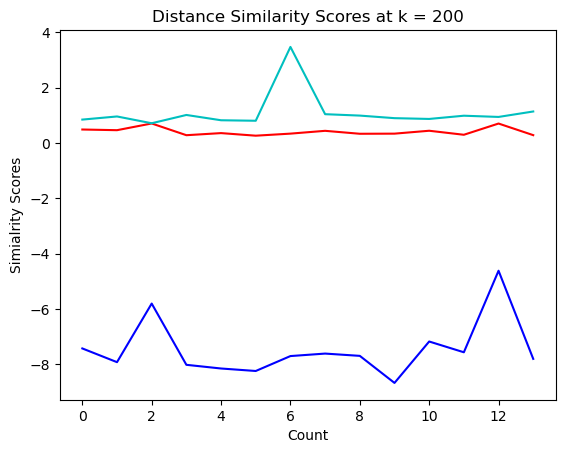

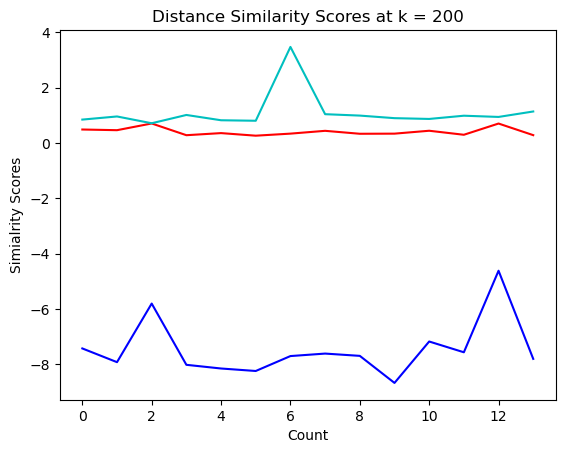

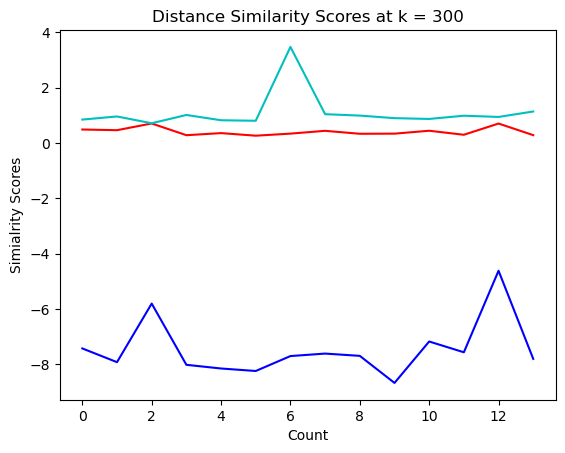

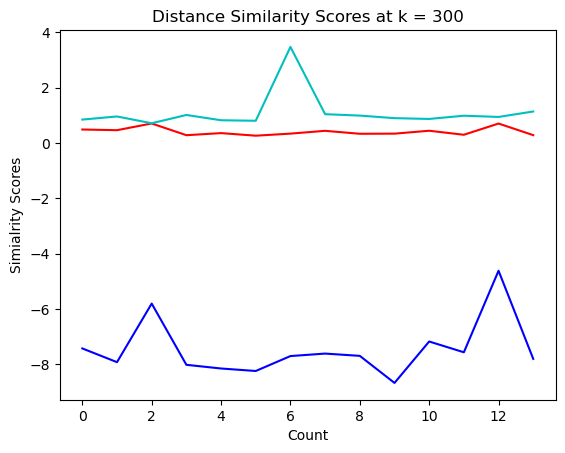

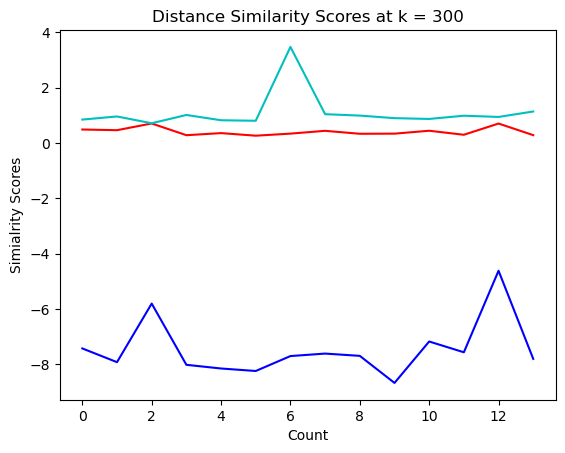

In [23]:
glove_arr = ["50", "100", "200", "300"]

## Calling Glove Model

fin_cosi, fin_eucd, fin_yule = [], [], []

for i in range(len(genre_arr)):
    avg_plot_cosi, avg_plot_eucd, avg_plot_yule = [], [], []
    for j in range(len(glove_arr)):
        
        path = "glove.6B/glove.6B." + glove_arr[i] + "d.txt"
        glove_word_vector = parse_file(path)
        
        cosi_similarity_glove, eucd_similarity_glove, yule_similarity_glove, avg_cosi, avg_eucd, avg_yule = cal_distances(que_list, opt_list, k = glove_arr[j], model="GloVe")

        # Displaying Similarity Scores

        display(cosi_similarity_glove.style.set_caption("Glove Cosine Similarity Scores for " + genre_arr[i] + " using Glove at " + glove_arr[j]))
        display(eucd_similarity_glove.style.set_caption("Glove Euclidean Similarity Scores for " + genre_arr[i] + " using Glove at " + glove_arr[j]))
        display(yule_similarity_glove.style.set_caption("Glove Yule Similarity Scores for " + genre_arr[i] + " using Glove at " + glove_arr[j]))

        avg_plot_cosi.append(avg_cosi)
        avg_plot_eucd.append(avg_eucd)
        avg_plot_yule.append(avg_yule)
    
    fin_cosi.append(avg_plot_cosi)
    fin_eucd.append(avg_plot_eucd)
    fin_yule.append(avg_plot_yule)
    
cosi = np.ravel(fin_cosi)
eucd = np.ravel(fin_eucd)
yule = np.ravel(fin_yule)
        

cosi_2D = np.reshape(cosi, (-1, len(fin_cosi[0])))
eucd_2D = np.reshape(eucd, (-1, len(fin_eucd[0])))
yule_2D = np.reshape(yule, (-1, len(fin_yule[0]))) 

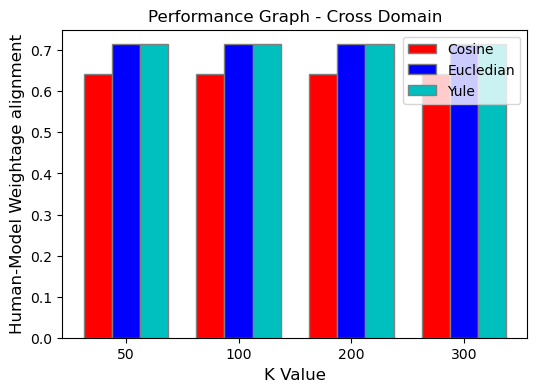

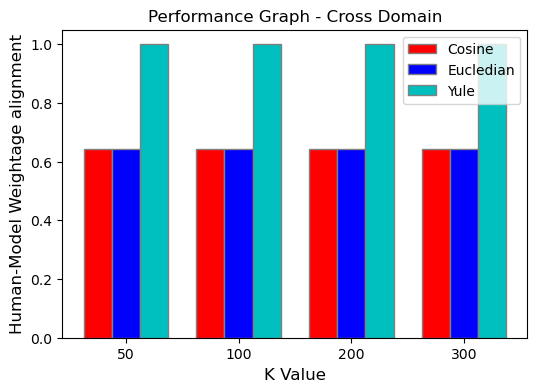

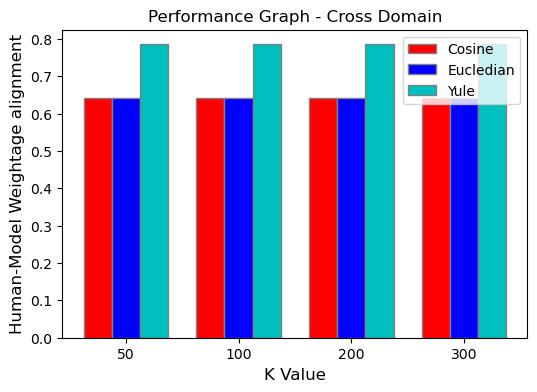

In [24]:
performance_graph(cosi_2D, eucd_2D, yule_2D, glove_arr)